In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
tracks = pd.read_csv('../songs_filtered.csv')
# artists = pd.read_csv('../artists_filtered.csv')
# artists['followers_log'] = np.log10(artists.followers + 1)

In [196]:
features = [
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',  # extremly discriminative!
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'popularity',
]

tracks_relevant = tracks[features]

In [197]:
tracks

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,tempo,duration_ms,time_signature,year,release_date,popularity,album_type,main_artist_id,genres,metagenre
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,117.906,210133,4.0,1999,1999-11-02,66.0,album,2d0hyoQ5ynDBnkvAbJKORj,"['alternative metal', 'alternative rock', 'con...",metal
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,103.680,206200,4.0,1999,1999-11-02,71.0,album,2d0hyoQ5ynDBnkvAbJKORj,"['alternative metal', 'alternative rock', 'con...",metal
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,149.749,298893,4.0,1999,1999-11-02,57.0,album,2d0hyoQ5ynDBnkvAbJKORj,"['alternative metal', 'alternative rock', 'con...",metal
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,96.752,213640,4.0,1999,1999-11-02,51.0,album,2d0hyoQ5ynDBnkvAbJKORj,"['alternative metal', 'alternative rock', 'con...",metal
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,127.059,205600,4.0,1999,1999-11-02,68.0,album,2d0hyoQ5ynDBnkvAbJKORj,"['alternative metal', 'alternative rock', 'con...",metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756677,4pqH5feu3uNB73ad9xEU9B,Winter Time,Christmas Blues,1wYxighrXciRyM6KjF5Gv2,"['Sabrina Claudio', 'Alicia Keys']","['30DhU7BDmF4PH0JVhu8ZRg', '3DiDSECUqqY1AuBP8q...",5,1,False,0.579,...,132.255,182312,4.0,2020,2020-11-27,45.0,album,30DhU7BDmF4PH0JVhu8ZRg,"['alternative r&b', 'chill r&b', 'pop', 'r&b']",alternative r&b
756678,4sxkBkYQKxMXfwynEConNR,Have Yourself A Merry Little Christmas,Christmas Blues,1wYxighrXciRyM6KjF5Gv2,['Sabrina Claudio'],['30DhU7BDmF4PH0JVhu8ZRg'],6,1,False,0.440,...,122.256,234478,4.0,2020,2020-11-27,40.0,album,30DhU7BDmF4PH0JVhu8ZRg,"['alternative r&b', 'chill r&b', 'pop', 'r&b']",alternative r&b
756679,0984kdcFfmBkZv8M9x4wcb,Short Red Silk Lingerie,Christmas Blues,1wYxighrXciRyM6KjF5Gv2,['Sabrina Claudio'],['30DhU7BDmF4PH0JVhu8ZRg'],7,1,False,0.592,...,88.997,204591,3.0,2020,2020-11-27,43.0,album,30DhU7BDmF4PH0JVhu8ZRg,"['alternative r&b', 'chill r&b', 'pop', 'r&b']",alternative r&b
756680,5z7PRDOZGxMZqEIzNWKYjT,Warm December,Christmas Blues,1wYxighrXciRyM6KjF5Gv2,['Sabrina Claudio'],['30DhU7BDmF4PH0JVhu8ZRg'],8,1,False,0.329,...,134.259,195669,4.0,2020,2020-11-27,46.0,album,30DhU7BDmF4PH0JVhu8ZRg,"['alternative r&b', 'chill r&b', 'pop', 'r&b']",alternative r&b


<AxesSubplot:>

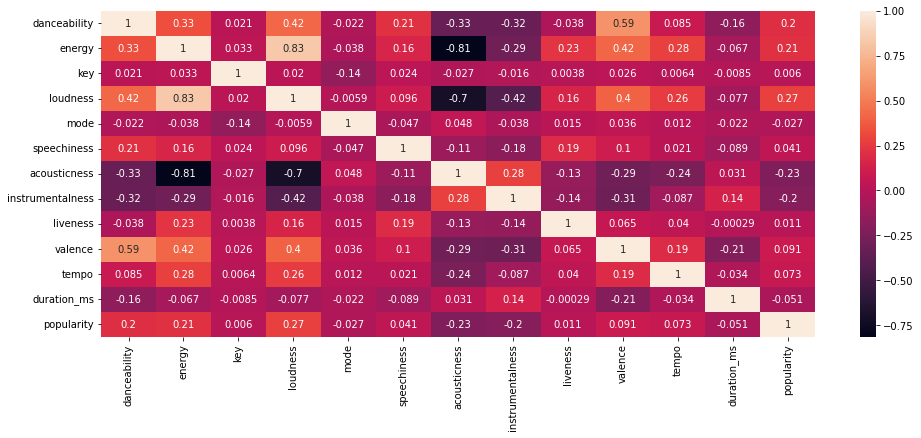

In [198]:
plt.figure(figsize=(16, 6))
sns.heatmap(tracks_relevant.corr(), annot=True)

In [248]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix

In [249]:
n_features = tracks_relevant.values.shape[1] - 1

X = tracks_relevant.values[:, :n_features]
y = tracks_relevant.values[:, n_features]

In [250]:
np.quantile(y, 0.5)

4.0

In [251]:
y = np.where(y > np.quantile(y, 0.5), 1, 0)

In [252]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
pipe = make_pipeline(StandardScaler(), GridSearchCV(
    LogisticRegression(),
    param_grid={
        'penalty': ['l2'],
        'class_weight': ['balanced'],
        # 'l1_ratio': [0.5],
        # 'solver': ['saga'],
        'C': np.logspace(-3, 3, 5)
    },
    cv=5,
    refit=True)
)

In [254]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [255]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([311312, 294033]))

In [256]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                                          'class_weight': ['balanced'],
                                          'penalty': ['l2']}))])

In [257]:
w = pipe.steps[1][1].best_estimator_.coef_

In [258]:
predictions = pipe.predict(X_test)
confusion_matrix(y_test, predictions)

array([[41487, 36337],
       [20437, 53076]])

In [259]:
pd.DataFrame(pipe.steps[1][1].cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.466323,0.011147,0.009347,0.001623,0.031623,balanced,l2,"{'C': 0.03162277660168379, 'class_weight': 'ba...",0.628683,0.626626,0.626477,0.625098,0.626354,0.626648,0.001154,1
2,0.462547,0.008933,0.008526,0.000405,1.0,balanced,l2,"{'C': 1.0, 'class_weight': 'balanced', 'penalt...",0.628699,0.626634,0.626461,0.625098,0.626304,0.626639,0.001163,2
3,0.458838,0.031999,0.008551,0.000510,31.622777,balanced,l2,"{'C': 31.622776601683793, 'class_weight': 'bal...",0.628699,0.626634,0.626453,0.625106,0.626296,0.626638,0.001162,3
4,0.437790,0.006175,0.008176,0.000249,1000.0,balanced,l2,"{'C': 1000.0, 'class_weight': 'balanced', 'pen...",0.628699,0.626634,0.626453,0.625106,0.626296,0.626638,0.001162,3
0,0.490259,0.031857,0.011426,0.002924,0.001,balanced,l2,"{'C': 0.001, 'class_weight': 'balanced', 'pena...",0.628443,0.626643,0.626411,0.625181,0.626403,0.626616,0.001048,5


In [260]:
accuracy_score(pipe.predict(X_test), y_test)

0.6248504992169793

In [261]:
w

array([[ 0.20758187, -0.1161373 , -0.00814974,  0.49700588, -0.043844  ,
        -0.03210171, -0.21058339, -0.14180538,  0.00803268, -0.16668715,
         0.03784481, -0.04621815]])

In [273]:


coefs = pd.DataFrame(
    np.ravel(w),
    columns=["Coefficients"],
    index=features[:len(features)-1],
)

coefs

,Coefficients
danceability,0.207582
energy,-0.116137
key,-0.008150
loudness,0.497006
mode,-0.043844
speechiness,-0.032102
acousticness,-0.210583
instrumentalness,-0.141805
liveness,0.008033
valence,-0.166687


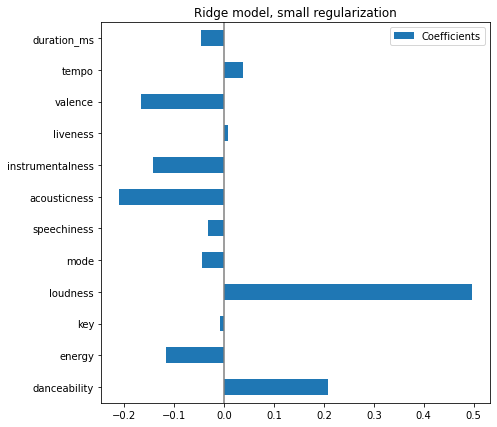

In [274]:
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

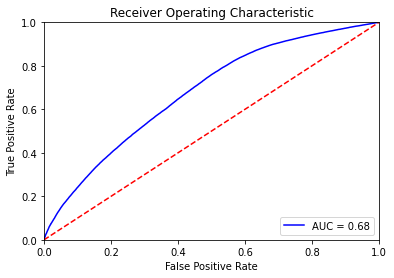

In [263]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = pipe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [264]:
from sklearn.metrics import classification_report

In [265]:
report = classification_report(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.67      0.53      0.59     77824
           1       0.59      0.72      0.65     73513

    accuracy                           0.62    151337
   macro avg       0.63      0.63      0.62    151337
weighted avg       0.63      0.62      0.62    151337



In [266]:
from sklearn.calibration import calibration_curve, CalibrationDisplay

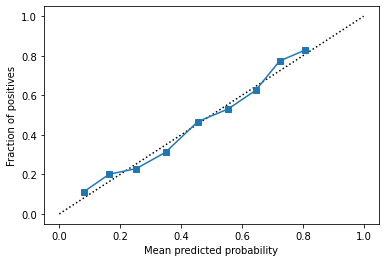

In [276]:
y_prob = pipe.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()

(0.0, 1.0)

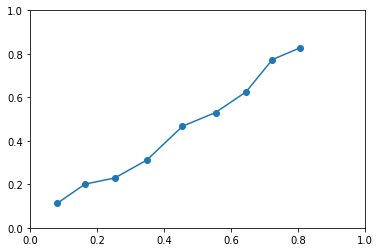

In [282]:
plt.plot(prob_pred, prob_true, marker='o')
plt.plot(0, 1)
plt.xlim([0, 1])
plt.ylim([0, 1])